<a href="https://colab.research.google.com/github/arunsingh22/CaseStudies/blob/master/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tqdm import tqdm
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/preprocessed_data.csv",nrows=10000)
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
y = data["project_is_approved"].values
print(data.project_is_approved.value_counts())
print("Remark : Data is highly imbalance")

#Dropping the project approved column from data
X = data.drop(["project_is_approved"],axis=1)

1    8620
0    1380
Name: project_is_approved, dtype: int64
Remark : Data is highly imbalance


In [ ]:
X.shape

(10000, 8)

In [ ]:
project= pd.read_csv("/content/drive/My Drive/Assignment_2/train_data.csv",nrows=10000)
project_title = project["project_title"].values #extracting the project title from the entire file

#Credits: https://colab.research.google.com/drive/1nUiNc5Cb38nTLjUopfNKgPL6g9jZmPY7#scrollTo=d6RCdphRCyn0
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

processed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_title):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    processed_project_title.append(sent.lower().strip())
project_title = processed_project_title
print()
print(project_title)
print()
project_title = pd.Series(project_title) # changing the dtype of project_title

100%|██████████| 10000/10000 [00:00<00:00, 74070.42it/s]

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

['educational support for english learners at home', 'wanted projector for hungry learners', 'soccer equipment for awesome middle school students', 'techie kindergarteners', 'interactive math tools', 'flexible seating for mrs jarvis terrific third graders', 'chromebooks for special education reading program', 'it is the 21st century', 'targeting more success in class', 'just for the love of reading pure pleasure', 'reading changes lives', 'elevating academics and parent rapports through technology', 'building life science experiences', 'everyone deserves to be heard', 'tablets can show us the world', 'making recess active', 'making great leap is with leapfrog', 'technology teaches tomorrow is talents today', 'test time', 'wiggling our way to success', 'magic carpet ride in our library', 'from sitting to standing in the classroom', 'books for budding intellectuals', 'instrumental power conquering steam', 's t e a m chal

##**SET 1: Using Bag of Words for featurization**

In [ ]:
#Credits: https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=jYm1BGtSPSxF&forceEdit=true&sandboxMode=true
# Taking all categorical features together - ENCODING USING THE BOW (ESSAY) 

# Encoding essay into onehot encoding using Countvectorizer/BOW
vect = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)               
BOW_essay = vect.fit_transform(X.essay.values)
print()

#BOW encoding of the project Title:
vect = CountVectorizer()
BOW_Train_project_title = vect.fit_transform(project_title)
print("BOW_Train_project_title: ",BOW_Train_project_title.shape)
print()

#Encoding the categorical features School state
vect = CountVectorizer()
train_school_state_OHE = vect.fit_transform(X.school_state.values)
print("train_school_state_OHE:",train_school_state_OHE.shape)
print()

#Encoding the categorical features teacher prefix
vect = CountVectorizer()
train_teacher_prefix_OHE = vect.fit_transform(X.teacher_prefix.values)
print("train_teacher_prefix_OHE: ",train_teacher_prefix_OHE.shape)
print()

#Encoding the categorical features project_grade_category
vect = CountVectorizer()
train_project_grade_category_OHE = vect.fit_transform(X.project_grade_category.values)
print("train_project_grade_category_OHE: ",train_project_grade_category_OHE.shape)
print()

#Encoding the categorical features clean_categories	
vect = CountVectorizer()
train_clean_categories_OHE = vect.fit_transform(X.clean_categories.values)
print("train_clean_categories_OHE:",train_clean_categories_OHE.shape)
print()

#Encoding the categorical features clean_subcategories	
vect = CountVectorizer()
train_clean_subcategories_OHE = vect.fit_transform(X.clean_subcategories.values)
print("train_clean_subcategories_OHE:",train_clean_subcategories_OHE.shape)
print()


BOW_Train_project_title:  (10000, 5495)

train_school_state_OHE: (10000, 51)

train_teacher_prefix_OHE:  (10000, 5)

train_project_grade_category_OHE:  (10000, 4)

train_clean_categories_OHE: (10000, 7)

train_clean_subcategories_OHE: (10000, 28)



####**Encoding Numerical Features : Price**

In [ ]:
#Credits :https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=rNl4cZNlPSxK&forceEdit=true&sandboxMode=true 
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_norm_price = normalizer.fit_transform(X['price'].values.reshape(-1,1))
print("train_norm_price: ",train_norm_price.shape)
print()

normalizer = StandardScaler()
train_norm_prev_posted_proj = normalizer.fit_transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("train_norm_prev_posted_proj",train_norm_prev_posted_proj.shape)
print()


train_norm_price:  (10000, 1)

train_norm_prev_posted_proj (10000, 1)



###**Putting all the features togther using hstack with BOW representation**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train = hstack((BOW_essay,BOW_Train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)


X_train:  (10000, 10592)


**Conlusion** : Since the X_train is very high dimensional 9350 we would apply first PCA and make dim = 500 followed by TSNE

In [ ]:
# from sklearn.decomposition import PCA 
# pca = PCA(n_components = 2000) 
# reduced_X_train = pca.fit_transform(X_train.toarray()) 
# explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=500, learning_rate=200,verbose=1)
X_embedding = tsne.fit_transform(X_train.toarray())

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 10000 samples in 8.198s...
[t-SNE] Computed neighbors for 10000 samples in 2411.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.109857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.453815


In [ ]:
plt.style.use('seaborn')
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'violet', 1:'red'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE on 2D Graph")
plt.xlabel("TSNE Dim 1")
plt.ylabel("TSNE Dim 2")
plt.show()

## **SET 2: Using TFIDF for featurization**

In [ ]:
# Encoding essay into onehot encoding using Countvectorizer/BOW
vect = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)               
TFidf_Train_essay = vect.fit_transform(X["essay"].values)
print("TFidf_Train_essay: ",TFidf_Train_essay.shape)
print()

#BOW encoding of the project Title:
vect = TfidfVectorizer()
TFidf_Train_project_title = vect.fit_transform(project_title)
print("TFidf_Train_project_title: ",TFidf_Train_project_title.shape)
print()

TFidf_Train_essay:  (6000, 5000)

TFidf_Train_project_title:  (6000, 4253)



###**Putting all the features togther using hstack with TFidf representation**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train = hstack((TFidf_Train_essay,TFidf_Train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

print()
print("X_train: ",X_train.shape)


X_train:  (6000, 9350)


In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=300, learning_rate=200,verbose=1)
X_embedding = tsne.fit_transform(X_train.toarray())

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 6000 samples in 3.124s...
[t-SNE] Computed neighbors for 6000 samples in 589.992s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.033148
[t-SNE] KL divergence after 50 iterations with early exaggeration: 62.533848
[t-SNE] KL divergence after 1000 iterations: 1.160723


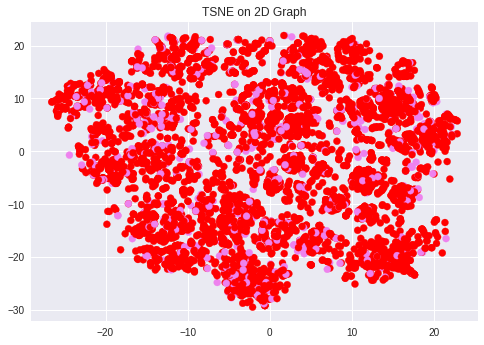

In [ ]:
plt.style.use('seaborn')
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'violet', 1:'red'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE on 2D Graph")
plt.show()

## **SET 3: Using Avg Word2Vec**

In [ ]:
# Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('/content/drive/My Drive/Assignment_2/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
#compute average word2vec for each train_project_title
avg_w2v_train_project_title = []; 
for sentence in tqdm(project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_project_title.append(vector)


100%|██████████| 6000/6000 [00:00<00:00, 39261.85it/s]


In [ ]:
#Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
#compute average word2vec for each train_essay
avg_w2v_train_essay= []; 
for sentence in tqdm(X["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_essay.append(vector)


100%|██████████| 6000/6000 [00:02<00:00, 2843.81it/s]


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((avg_w2v_train_essay,avg_w2v_train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)

X_train:  (6000, 697)


In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=300, learning_rate=200,verbose=1)
X_embedding = tsne.fit_transform(X_train.toarray())

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.168s...
[t-SNE] Computed neighbors for 6000 samples in 49.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.313056
[t-SNE] KL divergence after 200 iterations with early exaggeration: 59.791122
[t-SNE] KL divergence after 1000 iterations: 1.908174


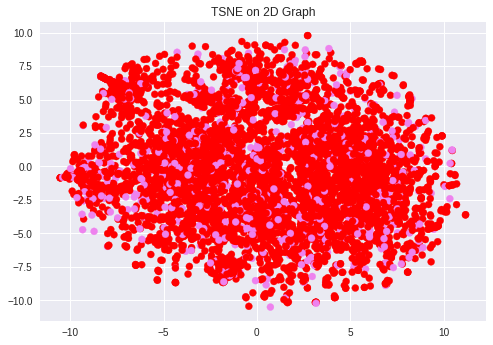

In [ ]:
plt.style.use('seaborn')
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'violet', 1:'red'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE on 2D Graph")
plt.show()

## **SET 4 : Using Tf-idf Word2Vec model for encoding the essay data.**

In [ ]:
import pickle
with open('/content/drive/My Drive/Assignment_2/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
#Tf-idf Word2Vec model for Essay column
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay_vectors.append(vector)

print(len(tfidf_w2v_train_essay_vectors))
print(len(tfidf_w2v_train_essay_vectors[0]))


100%|██████████| 6000/6000 [00:14<00:00, 417.79it/s]

6000
300


In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_project_title.append(vector)

print(len(tfidf_w2v_train_project_title))
print(len(tfidf_w2v_train_project_title[0]))


100%|██████████| 6000/6000 [00:00<00:00, 21488.63it/s]

6000
300


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((tfidf_w2v_train_essay_vectors,tfidf_w2v_train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)

X_train:  (6000, 697)


In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=300, learning_rate=200,verbose=1)
X_embedding = tsne.fit_transform(X_train.toarray())

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.167s...
[t-SNE] Computed neighbors for 6000 samples in 50.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.400837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.300022
[t-SNE] KL divergence after 1000 iterations: 1.943192


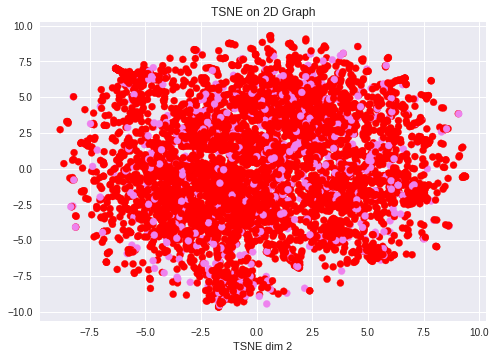

In [ ]:
plt.style.use('seaborn')
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'violet', 1:'red'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE on 2D Graph")
plt.xlabel("TSNE dim 1")
plt.xlabel("TSNE dim 2")
plt.show()

###**SET 5 : Combining All 4 Version of Text + Categorical +Numerical data**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((BOW_essay,TFidf_Train_essay,avg_w2v_train_essay,tfidf_w2v_train_essay_vectors,tfidf_w2v_train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)

X_train:  (6000, 10997)


[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 6000 samples in 3.628s...
[t-SNE] Computed neighbors for 6000 samples in 697.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 4.496636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.965096
[t-SNE] KL divergence after 1000 iterations: 1.623588


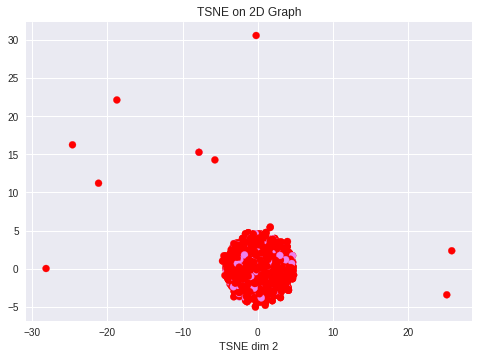

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=500, learning_rate=200,verbose=1)
X_embedding = tsne.fit_transform(X_train.toarray())

#Ploting into graph
plt.style.use('seaborn')
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'violet', 1:'red'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE on 2D Graph")
plt.xlabel("TSNE dim 1")
plt.xlabel("TSNE dim 2")
plt.show()

### **Analysis of the feature: teacher_number_of_previously_posted_projects**

In [ ]:
#refer:https://colab.research.google.com/drive/1eUs4kEIDL-RcAQWK8yJ2So39bvTv9s0H#scrollTo=ooqInUqlaJcf

#Getting the feature statistics
print(X['teacher_number_of_previously_posted_projects'].describe())
print()

#checking presence of Null values
print("Missing Values: ",X.teacher_number_of_previously_posted_projects.isna().sum())
print()

#Percentage of projects approved for new/old teachers 
y_value_counts = X['teacher_number_of_previously_posted_projects'].value_counts()
print("Number of projects that are approved for funding:", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects that are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print()

count    6000.000000
mean        9.651833
std        26.583894
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       345.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

Missing Values:  0

Number of projects that are approved for funding: 930 , ( 31.893004115226336 %)
Number of projects that are not approved for funding  1986 , ( 68.10699588477365 %)



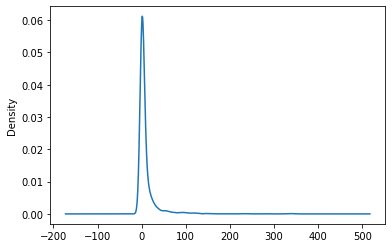

In [ ]:
#Probability Distribution of teacher_number_of_previously_posted_projects
X.teacher_number_of_previously_posted_projects.plot.kde()

###Summary

1.   Individual axes in t-SNE have no meaning at all. #https://stats.stackexchange.com/questions/348927/what-is-the-meaning-of-the-axes-in-t-sne
2.   There is no particular way to choose perplexity value , which is a hyper parameter but in practice 5% of your total data tends to be a good starting value. 
3. 




